In [1]:
import utils
import numpy as np
import random

T = (12,12)
K = 12
S = (1,1)

alpha = 0.1
gamma = 0.9
eps = np.random.random_sample()

# Générer les dictionnaires de transitions  d'états
transitions = utils.dict_transition(K, T, False)
transitions_trap = utils.dict_transition(K, T, True)

# Générer les récompenses 
rewards = utils.dict_rewards(K, T, False)
rewards_trap = utils.dict_rewards(K, T, True)

# Générer les tuples d'éta action
states, actions, states_actions = utils.state_action(K, False)
_, _, states_actions_trap = utils.state_action(K, True)

def sarsa(states_actions, rewards, states, actions, gamma, alpha, eps, T, iteration, transitions):
    
    # Liste des états non absorbants
    state_no_absorbing = list(set([t[0] for t in states_actions if t[1]!=None]))
    
    # Initialisation de Q
    q = utils.initilize_q(states_actions, T, state_no_absorbing)

    pi = {}
    
    for state, action in states_actions:
        if(action != None and (state, action) not in pi):
            pi = utils.maximize_q(q, state, actions, alpha, transitions, rewards, pi, eps)
       
    # Pour chaque épisode
    for episode in range(iteration):
        #print(episode)
        
        nb = random.randint(0, len(state_no_absorbing)-1)
        S =  state_no_absorbing[nb] # initialiser S
        # Choisir une action a depuis s en utilisant la politique spécifiée par Q (par exemple ε-greedy)
        a = utils.choice(S, pi, states_actions) #choisir a
              
        # Etape de l'épisode
        while(S in state_no_absorbing):
            S_prime = transitions[S][a] #take a and observe s prime
            r = rewards[S_prime] #observe r
            # Choisir a_prime
            if (S_prime in state_no_absorbing):
                a_prime = utils.choice(S_prime, pi, states_actions) #choisir a_prime
            else:
                a_prime = None
                q[(S, a)] = q[(S, a)] + alpha*(r + gamma*q[(S_prime, a_prime)] - q[(S, a)])
                break
                
            q[(S, a)] = q[(S, a)] + alpha*(r + gamma*q[(S_prime, a_prime)] - q[(S, a)])
            pi = utils.maximize_q(q, S, actions, alpha, transitions, rewards, pi, eps)

            S = S_prime
            a = a_prime
            
        eps = 1 / (episode + 2)
        
    return q, pi
      
eps = np.random.random_sample()

"""
Faire idem pour les autres questions
"""

# no trap
q_sarsa, pi_sarsa = sarsa(states_actions, rewards, states, actions, gamma, alpha, eps, T, 10000, transitions)

pi_final_sarsa = utils.construct_path(pi_sarsa, states_actions, transitions, S, T)

paths_sarsa, reward_sarsa = utils.optimal_policy(pi_final_sarsa, rewards, S, T, states_actions)


# trap
alpha = 0.1 # Entre 0 et 1
gamma = 0.9
q_sarsa_trap, pi_sarsa_trap = sarsa(states_actions_trap, rewards_trap, states, actions, gamma, alpha, eps, T, 10000, transitions_trap)

pi_final_sarsa_trap = utils.construct_path(pi_sarsa_trap, states_actions_trap, transitions_trap, S, T)
paths_sarsa_trap, reward_sarsa_trap = utils.optimal_policy(pi_final_sarsa_trap, rewards_trap, S, T, states_actions_trap)

In [2]:
def path(pi):
    v=np.zeros((12,12),dtype='int')
    i,j=1,1
    k,l=0,0
    v[k,l]=1
    while (i,j)!=(12,12):
        if pi[(i,j)][0]=='up':
            j+=1
            k+=1
        
        elif pi[(i,j)][0]=='down':
            j-=1
            k-=1
        elif pi[(i,j)][0]=='right':
            i+=1
            l+=1
        else:
            i-=1
            l-=1
        v[k,l]=1
    return v

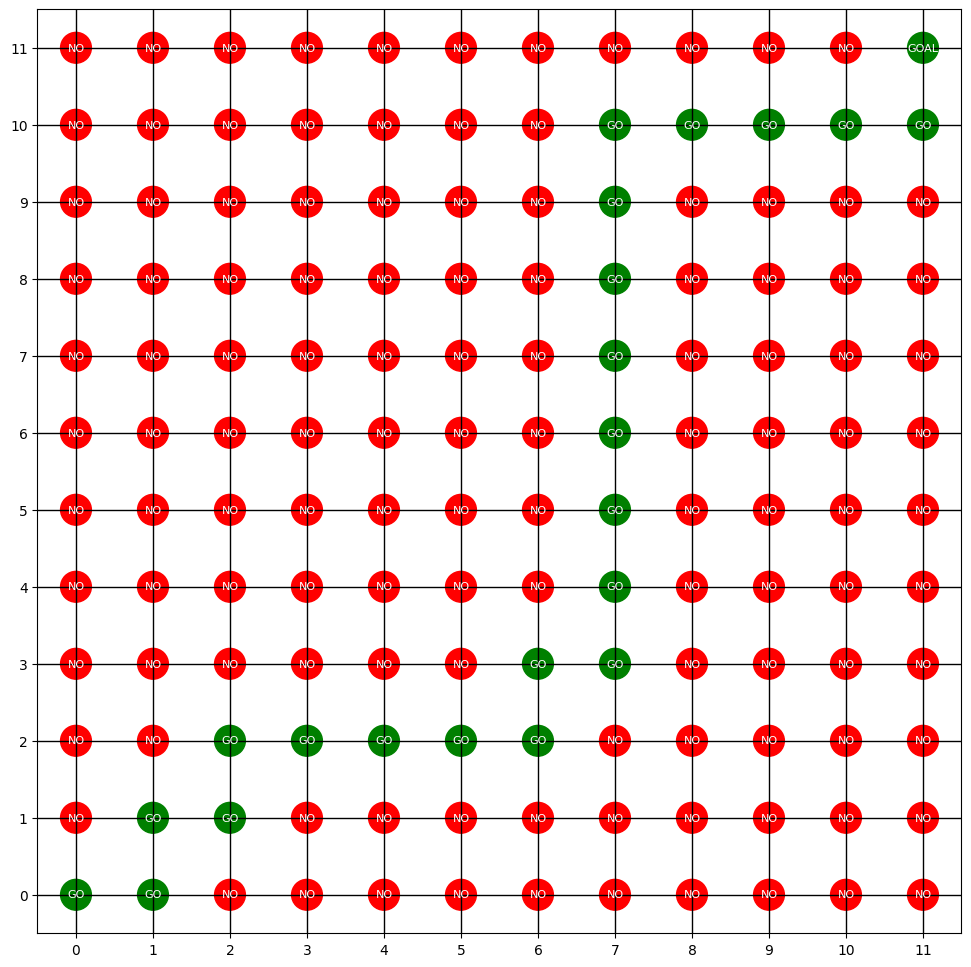

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_path(matrix):
    matrix_size = np.shape(matrix)
    fig, ax = plt.subplots(figsize=matrix_size)

    for i in range(matrix_size[0]):
        for j in range(matrix_size[1]):
            if matrix[i, j] == 0:
                circle = plt.Circle((j, i), 0.2, color='red')
                ax.add_artist(circle)
                ax.text(j, i, 'NO', ha='center', va='center', color='white', fontsize=8)
            elif matrix[i, j] != 0 and (i==11 and j==11):
                circle = plt.Circle((j, i), 0.2, color='green')
                ax.add_artist(circle)
                ax.text(j, i, 'GOAL', ha='center', va='center', color='white', fontsize=8)
            else:
                circle = plt.Circle((j, i), 0.2, color='green')
                ax.add_artist(circle)
                ax.text(j, i, 'GO', ha='center', va='center', color='white', fontsize=8)

    ax.set_xlim(-0.5, matrix_size[1] - 0.5)
    ax.set_ylim(-0.5, matrix_size[0] - 0.5)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(matrix_size[1]))
    ax.set_yticks(np.arange(matrix_size[0]))
    ax.set_xticklabels(np.arange(matrix_size[0]))
    ax.set_yticklabels(np.arange(matrix_size[0]))
    ax.grid(which='both', color='black', linestyle='-', linewidth=1)
    plt.show()



plot_path(path(pi_final_sarsa))


#SARSA WITH TRAPS

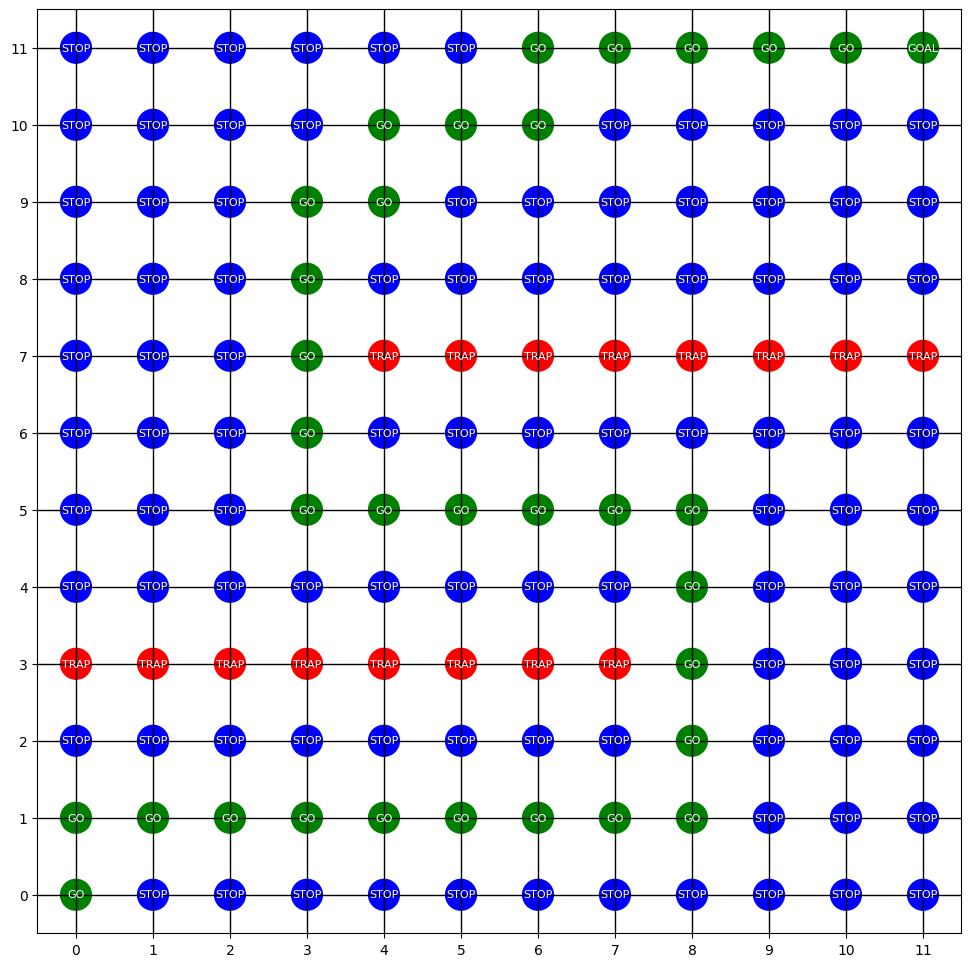

In [4]:

import numpy as np
import matplotlib.pyplot as plt
traps = [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7),
                      (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7,10), (7, 11)]
def plot_path(matrix, traps):
    matrix_size = np.shape(matrix)
    fig, ax = plt.subplots(figsize=matrix_size)

    for i in range(matrix_size[0]):
        for j in range(matrix_size[1]):
            if matrix[i, j] == 0 and (i,j) in traps:
                circle = plt.Circle((j, i), 0.2, color='red')
                ax.add_artist(circle)
                ax.text(j, i, 'TRAP', ha='center', va='center', color='white', fontsize=8)
            elif matrix[i, j] == 0:
                circle = plt.Circle((j, i), 0.2, color='blue')
                ax.add_artist(circle)
                ax.text(j, i, 'STOP', ha='center', va='center', color='white', fontsize=8)
            elif matrix[i, j] != 0 and (i==11 and j==11):
                circle = plt.Circle((j, i), 0.2, color='green')
                ax.add_artist(circle)
                ax.text(j, i, 'GOAL', ha='center', va='center', color='white', fontsize=8)
            else:
                circle = plt.Circle((j, i), 0.2, color='green')
                ax.add_artist(circle)
                ax.text(j, i, 'GO', ha='center', va='center', color='white', fontsize=8)

    ax.set_xlim(-0.5, matrix_size[1] - 0.5)
    ax.set_ylim(-0.5, matrix_size[0] - 0.5)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(matrix_size[1]))
    ax.set_yticks(np.arange(matrix_size[0]))
    ax.set_xticklabels(np.arange(matrix_size[0]))
    ax.set_yticklabels(np.arange(matrix_size[0]))
    ax.grid(which='both', color='black', linestyle='-', linewidth=1)
    plt.show()



plot_path(path(pi_final_sarsa_trap),traps)
